# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [122]:
tesla_df = pd.read_csv('TESLA Search Trend vs Price.csv')

btc_search_df = pd.read_csv('Bitcoin Search Trend.csv')
btc_price_df = pd.read_csv('Daily Bitcoin Price.csv')

unemployment_df = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [106]:
tesla_shape = tesla_df.shape
print(f'row: {tesla_shape[0]}')
print(f'col: {tesla_shape[1]}')
print(tesla_df.columns)

row: 124
col: 3
Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')


In [107]:
print(f'Largest value for Tesla in Web Search:{tesla_df['TSLA_WEB_SEARCH'].min()}')
print(f'Smallest value for Tesla in Web Search:{tesla_df['TSLA_USD_CLOSE'].min()}')

Largest value for Tesla in Web Search:2
Smallest value for Tesla in Web Search:3.896


In [108]:
tesla_df.describe()
tesla_df.MONTH

0      2010-06-01
1      2010-07-01
2      2010-08-01
3      2010-09-01
4      2010-10-01
          ...    
119    2020-05-01
120    2020-06-01
121    2020-07-01
122    2020-08-01
123    2020-09-01
Name: MONTH, Length: 124, dtype: object

### Unemployment Data

In [109]:
#whatever you want it to mean

In [110]:
print(f'Largest value for "Unemployemnt Benefits" in Web Search: {unemployment_df['UE_BENEFITS_WEB_SEARCH'].max}')

Largest value for "Unemployemnt Benefits" in Web Search: <bound method Series.max of 0      34
1      33
2      25
3      29
4      23
       ..
176    14
177    15
178    16
179    17
180    21
Name: UE_BENEFITS_WEB_SEARCH, Length: 181, dtype: int64>


### Bitcoin

In [111]:
btc_price_df.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

In [112]:
btc_search_df.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [113]:
print(f'largest BTC News Search: {btc_search_df['BTC_NEWS_SEARCH'].max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [114]:
print(f'Missing values for Tesla?: {tesla_df.isnull()}')
print(f'Missing values for U/E?: {unemployment_df.isnull()}')
print(f'Missing values for BTC Search?: {btc_search_df.isnull()}')

Missing values for Tesla?:      MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0    False            False           False
1    False            False           False
2    False            False           False
3    False            False           False
4    False            False           False
..     ...              ...             ...
119  False            False           False
120  False            False           False
121  False            False           False
122  False            False           False
123  False            False           False

[124 rows x 3 columns]
Missing values for U/E?:      MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0    False                   False   False
1    False                   False   False
2    False                   False   False
3    False                   False   False
4    False                   False   False
..     ...                     ...     ...
176  False                   False   False
177  False                   False   False
178  Fals

In [115]:
print(f'Missing values for BTC price?:{btc_price_df.isnull()} ')

Missing values for BTC price?:       DATE  CLOSE  VOLUME
0     False  False   False
1     False  False   False
2     False  False   False
3     False  False   False
4     False  False   False
...     ...    ...     ...
2199  False  False   False
2200  False  False   False
2201  False  False   False
2202  False  False   False
2203  False  False   False

[2204 rows x 3 columns] 


In [116]:
print('Number of missing values: 0')

Number of missing values: 0


**Challenge**: Remove any missing values that you found. 

In [117]:
print(f'Missing values for Tesla?: {tesla_df.dropna()}')
print(f'Missing values for U/E?: {unemployment_df.dropna()}')
print(f'Missing values for BTC Search?: {btc_search_df.dropna()}')
print(f'Missing values for BTC price?:{btc_price_df.dropna()}')

print(tesla_df.shape)
print(unemployment_df.shape)
print(btc_price_df.shape)
print(btc_search_df.shape)

Missing values for Tesla?:           MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0    2010-06-01                3        4.766000
1    2010-07-01                3        3.988000
2    2010-08-01                2        3.896000
3    2010-09-01                2        4.082000
4    2010-10-01                2        4.368000
..          ...              ...             ...
119  2020-05-01               16      167.000000
120  2020-06-01               17      215.962006
121  2020-07-01               24      286.152008
122  2020-08-01               23      498.320007
123  2020-09-01               31      407.339996

[124 rows x 3 columns]
Missing values for U/E?:        MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0    2004-01                      34     5.7
1    2004-02                      33     5.6
2    2004-03                      25     5.8
3    2004-04                      29     5.6
4    2004-05                      23     5.6
..       ...                     ...     ...
176  2018-09         

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [148]:
tesla_df['MONTH'] = pd.to_datetime(tesla_df['MONTH'], format='%Y-%d-%m')
unemployment_df['MONTH'] = pd.to_datetime(unemployment_df['MONTH'], format='%Y-%m')
btc_price_df['DATE'] = pd.to_datetime(btc_price_df['DATE'])
btc_search_df['MONTH'] = pd.to_datetime(btc_search_df['MONTH'])

tesla_df.MONTH


0     2010-06-01
1     2010-07-01
2     2010-08-01
3     2010-09-01
4     2010-10-01
         ...    
119   2020-05-01
120   2020-06-01
121   2020-07-01
122   2020-08-01
123   2020-09-01
Name: MONTH, Length: 124, dtype: datetime64[ns]

In [152]:
type(tesla_df.MONTH.iat[1])
# type(unemployment_df.MONTH[1])

pandas._libs.tslibs.timestamps.Timestamp

In [169]:
tesla_df.columns

Index(['TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [168]:
tesla_df.set_index('MONTH', inplace=False)


KeyError: "None of ['MONTH'] are in the columns"

In [172]:
tesla_df.resample('D').ffill()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
MONTH,,
2010-06-01,3,4.766000
2010-06-02,3,4.766000
2010-06-03,3,4.766000
2010-06-04,3,4.766000
2010-06-05,3,4.766000
...,...,...
2020-08-28,23,498.320007
2020-08-29,23,498.320007
2020-08-30,23,498.320007


# Data Visualisation

### Notebook Formatting & Style Helpers

In [ ]:
# Create locators for ticks on the time axis

In [ ]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

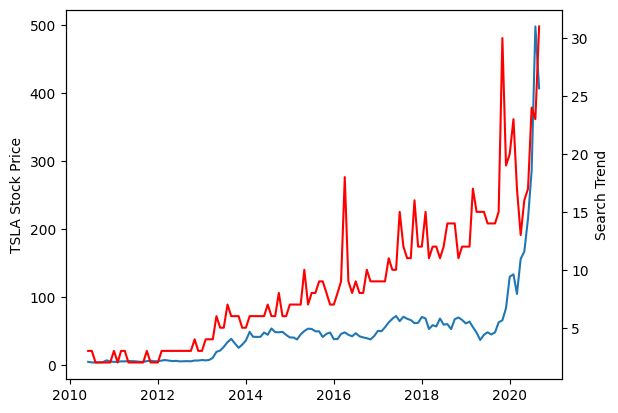

In [198]:
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()
 
ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('Search Trend')
 
ax1.plot(tesla_df.index, tesla_df.TSLA_USD_CLOSE)
ax2.plot(tesla_df.index, tesla_df.TSLA_WEB_SEARCH, color='red')


**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

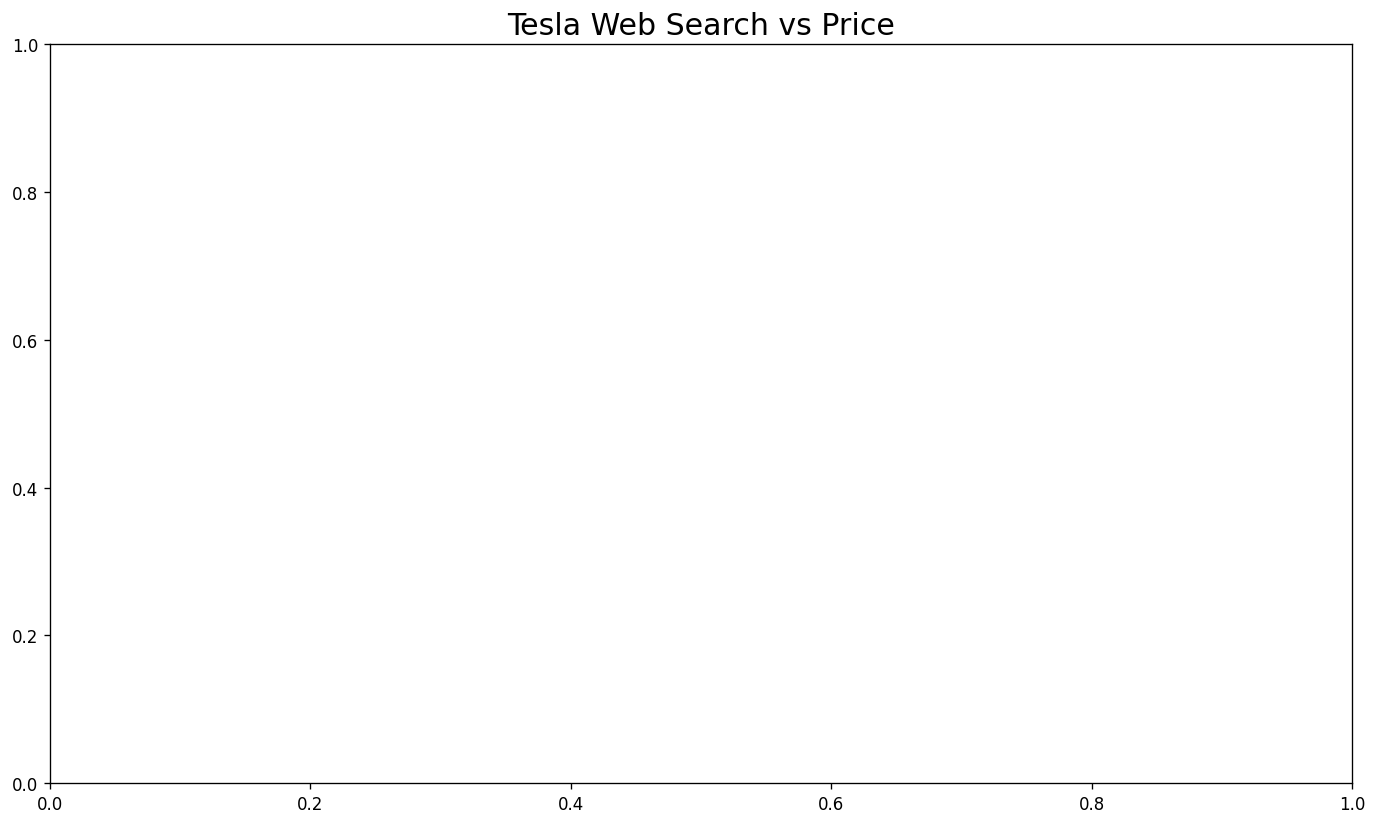

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

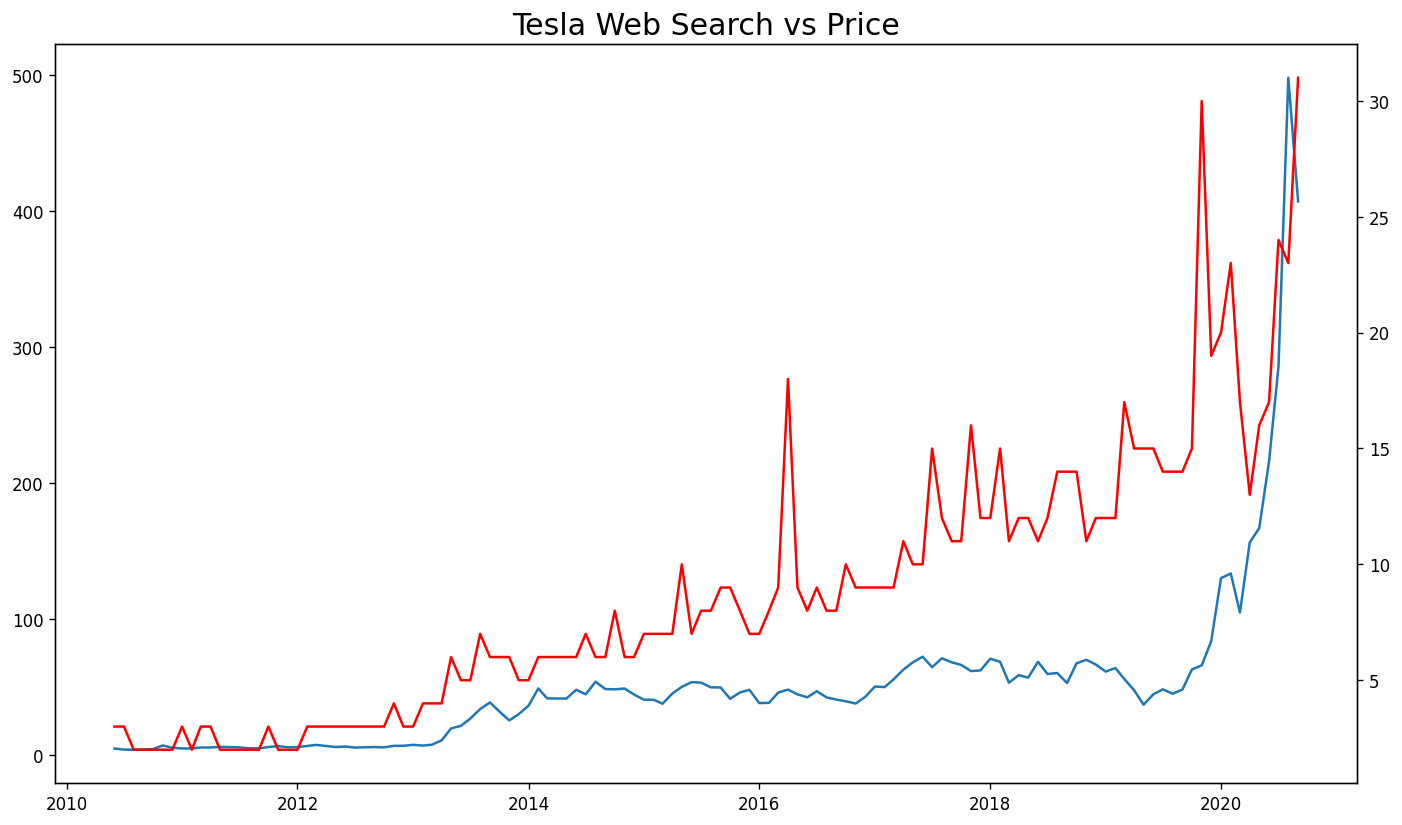

In [199]:
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18)

ax1.set_ylabel('TSLA Stock Price', fontsize=14)
ax2.set_ylabel('Search Trend', fontsize=14)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.plot(tesla_df.index, tesla_df.TSLA_USD_CLOSE)
ax2.plot(tesla_df.index, tesla_df.TSLA_WEB_SEARCH, color='red')


plt.show()

How to add tick formatting for dates on the x-axis. 

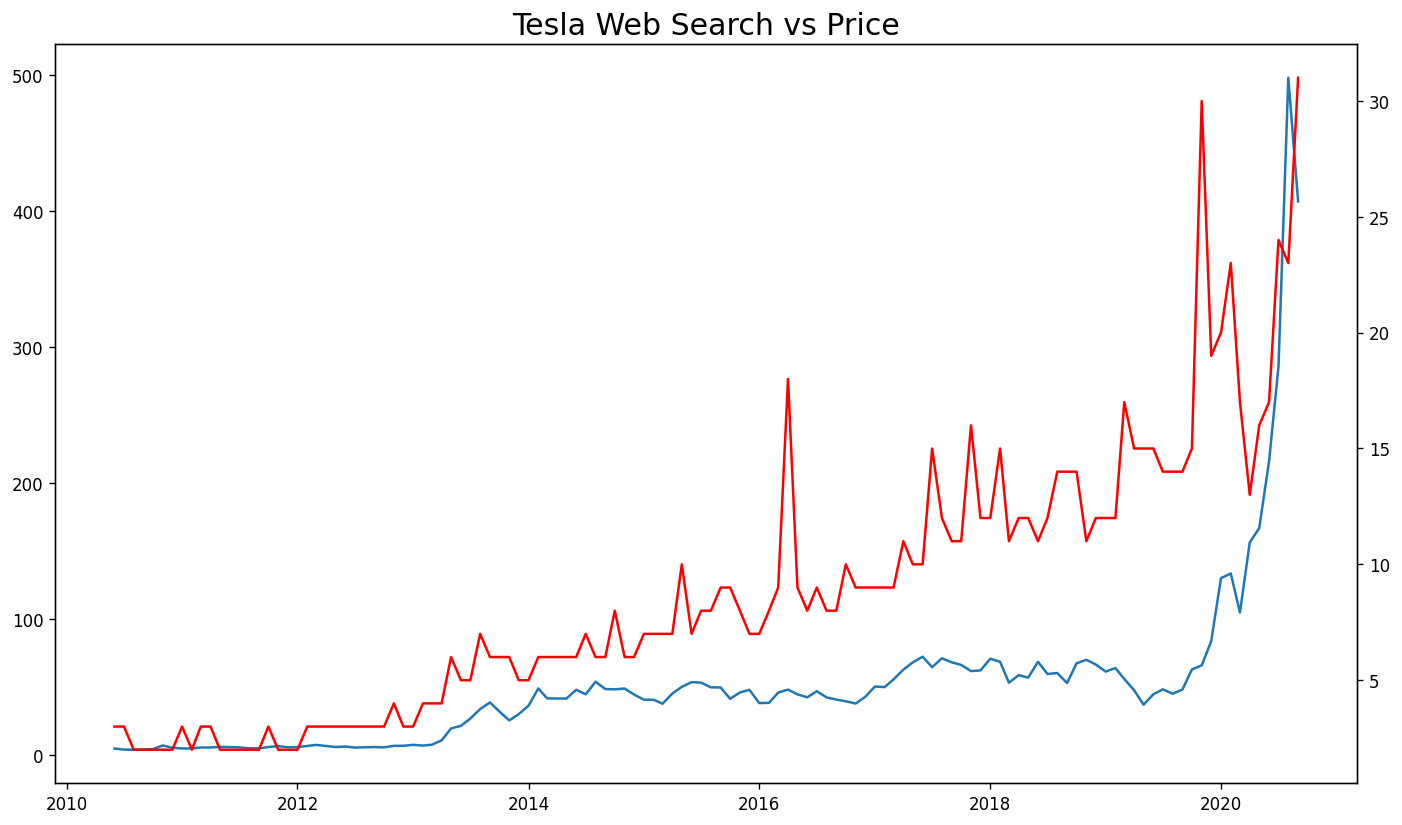

                      DATE         CLOSE        VOLUME
count                 2204   2203.000000  2.203000e+03
mean   2017-09-22 12:00:00   4429.421245  8.043622e+09
min    2014-09-17 00:00:00    178.102997  5.914570e+06
25%    2016-03-20 18:00:00    433.629502  6.029915e+07
50%    2017-09-22 12:00:00   3637.520020  2.018890e+09
75%    2019-03-27 06:00:00   7997.372803  1.322478e+10
max    2020-09-28 00:00:00  19497.400391  7.415677e+10
std                    NaN   4148.150071  1.176529e+10
                               MONTH  BTC_NEWS_SEARCH
count                             73        73.000000
mean   2017-08-31 09:32:03.287671296        15.013699
min              2014-09-01 00:00:00         3.000000
25%              2016-03-01 00:00:00         5.000000
50%              2017-09-01 00:00:00        14.000000
75%              2019-03-01 00:00:00        18.000000
max              2020-09-01 00:00:00       100.000000
std                              NaN        15.146959


In [207]:
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18)

ax1.set_ylabel('TSLA Stock Price', fontsize=14)
ax2.set_ylabel('Search Trend', fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([tesla_df.index.min(), tesla_df.index.max()])

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.plot(tesla_df.index, tesla_df.TSLA_USD_CLOSE)
ax2.plot(tesla_df.index, tesla_df.TSLA_WEB_SEARCH, color='red')


plt.show()

print(btc_price_df.describe())
print(btc_search_df.describe())

### Bitcoin (BTC) Price v.s. Search Volume

In [227]:
btc_price_df.resample('YE', on="DATE")
btc_search_df.resample('YE', on="MONTH")

btc_price_df

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

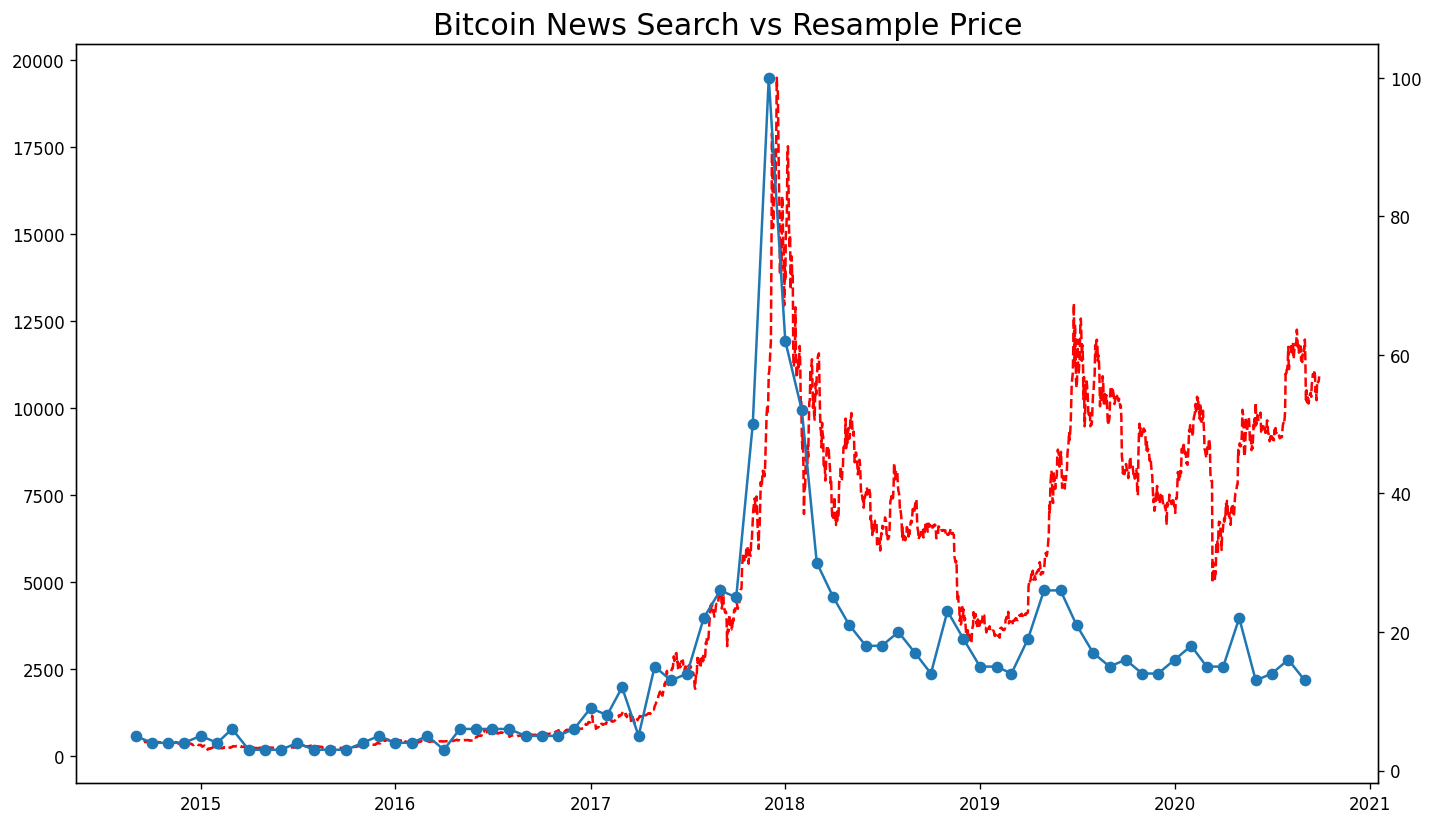

In [234]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoin News Search vs Resample Price', fontsize=18)

ax1.set_ylabel('BTC Price', fontsize=14)


ax1.set_ylim([btc_price_df.CLOSE.min(), btc_price_df.CLOSE.max()])
ax1.set_xlim([btc_price_df.DATE.min(), btc_price_df.DATE.max()])

ax2.set_ylim([btc_search_df['BTC_NEWS_SEARCH'].min(), btc_search_df['BTC_NEWS_SEARCH'].max()])

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()



ax1.plot(btc_price_df.DATE, btc_price_df.CLOSE, color='red', linestyle='dashed')
ax2.plot(btc_search_df.MONTH, btc_search_df.BTC_NEWS_SEARCH, marker='o')





### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?